In [1]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy
import scipy.signal as signal
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
import scipy
import statsmodels.distributions.empirical_distribution as ed
import neo

In [2]:
x = loadmat('C:/Users/rajra/OneDrive/Desktop/books/analysis of neural data/Ch11-spikes-LFP-1')

In [7]:
lfp = x['y']

spike_train = x['n']
 
t = x['t']
t = np.reshape(t, (1000))

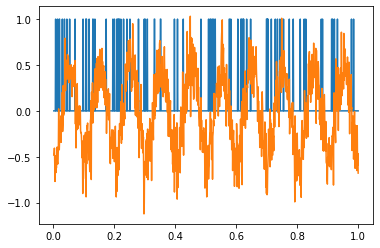

In [16]:
plt.plot(t,spike_train[5,:])
plt.plot(t,lfp[5,:])

In [38]:
win = 100
K = lfp.shape[0]
N = lfp.shape[1]
sta = np.zeros((K,2*win+1))
for i in range(K):
    spikes = np.argwhere(spike_train[i,:] == 1) 
    for j in range(len(spikes)):
        if (spikes[j][0] > win) and (spikes[j][0] + win < N):
            range_min = spikes[j][0] - win
            range_max = spikes[j][0] +win
            sta[i,:] = sta[i,:] + lfp[i,range_min:range_max+1]/len(spikes)



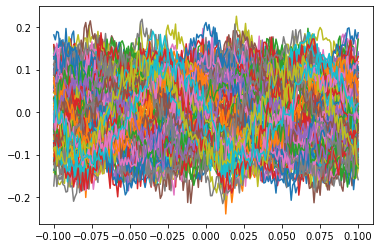

In [46]:
for i in range(100):
    plt.plot(np.arange(-0.1,0.1+0.001,0.001),sta[i,:])


In [69]:
Cxy_sum = 0
for i in range(K):
    dt = t[1] - t[0]
    Fs = 1/dt
    f, Cxy = scipy.signal.coherence(spike_train[i,:], lfp[i,:], Fs)
    Cxy_sum = Cxy_sum + Cxy
Cxy = Cxy_sum/K

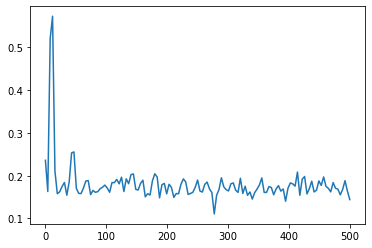

In [70]:
plt.plot(f,Cxy)